In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

sns.set(rc={'figure.figsize':(20,15)}, style='whitegrid')

from sklearn.cluster import KMeans

In [4]:
dataframe = pd.read_excel('Spotify Charts.xlsx')

### Pre-Processing

In [37]:
data = dataframe.drop(['Unnamed: 0'], axis=1) #duplicating the dataframe

In [38]:
data.shape

(95, 34)

In [39]:
data.columns

Index(['wrapperType', 'kind', 'collectionId', 'trackId', 'artistName',
       'collectionName', 'trackName', 'collectionCensoredName',
       'trackCensoredName', 'collectionViewUrl', 'feedUrl', 'trackViewUrl',
       'artworkUrl30', 'artworkUrl60', 'artworkUrl100', 'collectionPrice',
       'trackPrice', 'trackRentalPrice', 'collectionHdPrice', 'trackHdPrice',
       'trackHdRentalPrice', 'releaseDate', 'collectionExplicitness',
       'trackExplicitness', 'trackCount', 'country', 'currency',
       'primaryGenreName', 'contentAdvisoryRating', 'artworkUrl600',
       'genreIds', 'genres', 'artistId', 'artistViewUrl'],
      dtype='object')

In [40]:
#dropping irrelevant fields for now
data = data.drop(['wrapperType', 'kind', 'trackId', 'trackName', 'collectionCensoredName',
       'trackCensoredName', 'collectionViewUrl', 'feedUrl', 'trackViewUrl',
       'artworkUrl30', 'artworkUrl60', 'artworkUrl100', 'collectionPrice',
       'trackPrice', 'trackRentalPrice', 'collectionHdPrice', 'trackHdPrice',
       'trackHdRentalPrice', 'collectionExplicitness',
       'trackExplicitness', 'currency', 'artworkUrl600',
       'genreIds', 'artistId', 'artistViewUrl'], axis=1)

In [93]:
data['country'].value_counts()

USA    95
Name: country, dtype: int64

In [96]:
data = data.drop(['country'], axis = 1)

In [108]:
data.head()

,collectionId,artistName,collectionName,releaseDate,trackCount,primaryGenreName,contentAdvisoryRating,genres,Year
0,1459227062,Boiling Waters PH,Boiling Waters PH,2020-02-09 12:25:00+00:00,63,Comedy,Clean,"['Comedy', 'Podcasts']",2020
1,1387922676,info@podcastgarden.com (),The Morning Rush RX 93.1 - 2018,2018-02-05 07:00:00+00:00,26,Comedy,Clean,"['Comedy', 'Podcasts']",2018
2,1439313975,Joyce Pring,Adulting With Joyce Pring,2020-02-05 06:12:00+00:00,35,Self-Improvement,Clean,"['Self-Improvement', 'Podcasts', 'Education']",2020
3,1455713016,Mohan Gumatay,Good Times with Mo: The Podcast Season 7,2020-02-08 22:37:00+00:00,115,Society & Culture,Explicit,"['Society & Culture', 'Podcasts']",2020
4,160904630,TED,TED Talks Daily,2020-02-11 15:57:00+00:00,277,Design,Clean,"['Design', 'Podcasts', 'Arts', 'Education']",2020


In [100]:
data['releaseDate'] = pd.to_datetime(data['releaseDate'])

In [104]:
data['Year'] = data['releaseDate'].dt.year

In [105]:
data['Year'].value_counts()

2020    90
2019     3
2018     2
Name: Year, dtype: int64

### Comedy is the most common genre

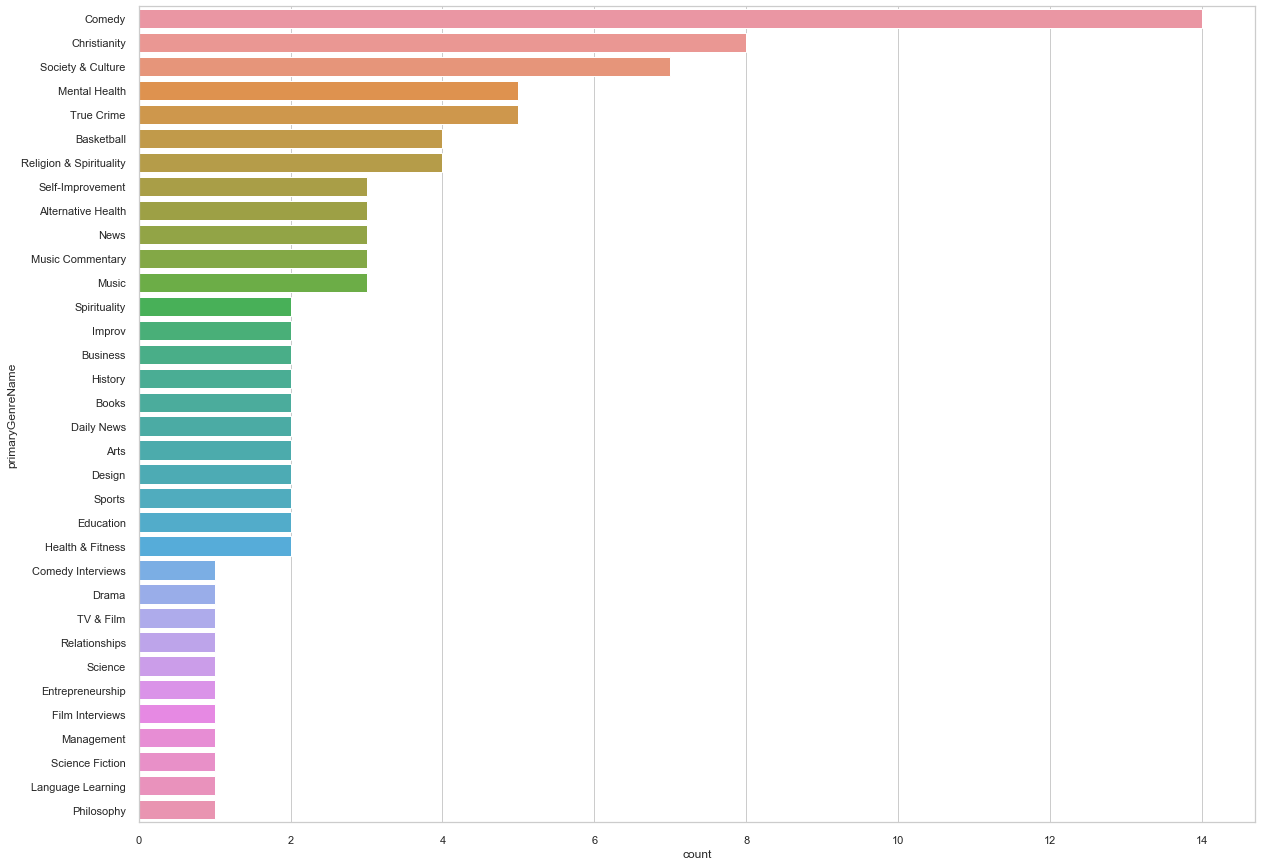

In [140]:
sns.countplot(y=data['primaryGenreName'], order = data['primaryGenreName'].value_counts().index)

In [110]:
# Get features we need
features = ['primaryGenreName', 'trackCount', 'Year']
X = data[features]